Question 1: Numerical variable with the highest AUC: engine_hp


C:\Users\Detoxx\AppData\Local\Temp\ipykernel_12860\1862994660.py:37: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
C:\Users\Detoxx\AppData\Local\Temp\ipykernel_12860\1862994660.py:44: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')


Question 2: AUC of the model on the validation dataset: 0.98


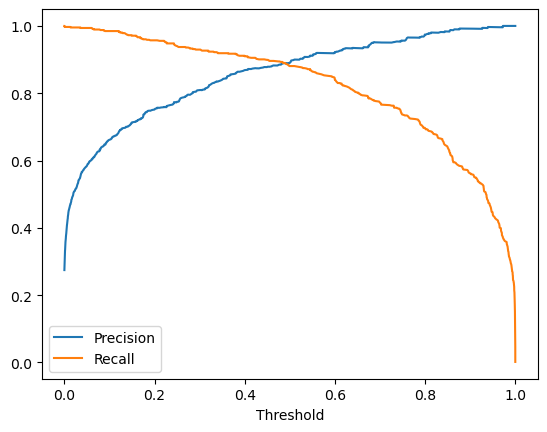

Question 3: Threshold where precision and recall curves intersect: 0.49
Question 4: Threshold where F1 score is maximal: 0.53


C:\Users\Detoxx\AppData\Local\Temp\ipykernel_12860\1862994660.py:77: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = train_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
C:\Users\Detoxx\AppData\Local\Temp\ipykernel_12860\1862994660.py:84: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = val_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
C:\Users\Detoxx\AppData\Local\Temp\ipykernel_12860\1862994660.py:77: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = train_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(or

Question 5: Standard deviation of AUC scores across different folds: 0.002


C:\Users\Detoxx\AppData\Local\Temp\ipykernel_12860\1862994660.py:113: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = val_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
C:\Users\Detoxx\AppData\Local\Temp\ipykernel_12860\1862994660.py:106: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = train_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
C:\Users\Detoxx\AppData\Local\Temp\ipykernel_12860\1862994660.py:113: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = val_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(ori

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score, roc_curve, auc
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
df = pd.read_csv(url)

# Data preparation
df = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.fillna(0, inplace=True)
df['above_average'] = (df['msrp'] > df['msrp'].mean()).astype(int)

# Split the data into train/validation/test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Question 1: ROC AUC feature importance
numerical_vars = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
auc_scores = {}

for var in numerical_vars:
    auc_score = roc_auc_score(df_train['above_average'], df_train[var])
    if auc_score < 0.5:
        auc_score = roc_auc_score(df_train['above_average'], -df_train[var])
    auc_scores[var] = auc_score

highest_auc_var = max(auc_scores, key=auc_scores.get)
print("Question 1: Numerical variable with the highest AUC:", highest_auc_var)

# Question 2: Training the model
dv = DictVectorizer(sparse=False)
train_dict = df_train[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
y_train = df_train['above_average']

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_val = df_val['above_average']

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("Question 2: AUC of the model on the validation dataset:", round(roc_auc, 3))

# Question 3: Precision and Recall
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

# Identify the threshold where precision and recall curves intersect
intersection_threshold = thresholds[(precisions[:-1] == recalls[:-1]).argmax()]
print("Question 3: Threshold where precision and recall curves intersect:", round(intersection_threshold, 2))

# Question 4: F1 score
f1_scores = [f1_score(y_val, y_pred >= threshold) for threshold in thresholds]
max_f1_threshold = thresholds[f1_scores.index(max(f1_scores))]
print("Question 4: Threshold where F1 score is maximal:", round(max_f1_threshold, 2))

# Question 5: 5-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=1)
auc_scores_cv = []

for train_idx, val_idx in kf.split(df_full_train):
    train_data = df_full_train.iloc[train_idx]
    val_data = df_full_train.iloc[val_idx]

    train_dict = train_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    y_train = train_data['above_average']

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dict = val_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_val = val_data['above_average']

    y_pred = model.predict_proba(X_val)[:, 1]
    roc_auc_cv = roc_auc_score(y_val, y_pred)
    auc_scores_cv.append(roc_auc_cv)

std_auc_cv = round(pd.Series(auc_scores_cv).std(), 3)
print("Question 5: Standard deviation of AUC scores across different folds:", std_auc_cv)

# Question 6: Hyperparameter Tuning
C_values = [0.01, 0.1, 0.5, 10]
mean_scores = []
std_scores = []

for C in C_values:
    auc_scores_cv = []
    for train_idx, val_idx in kf.split(df_full_train):
        train_data = df_full_train.iloc[train_idx]
        val_data = df_full_train.iloc[val_idx]

        train_dict = train_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)
        y_train = train_data['above_average']

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        val_dict = val_data[numerical_vars + ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_val = val_data['above_average']

        y_pred = model.predict_proba(X_val)[:, 1]
        roc_auc_cv = roc_auc_score(y_val, y_pred)
        auc_scores_cv.append(roc_auc_cv)

    mean_auc = round(pd.Series(auc_scores_cv).mean(), 3)
